# 모형에 입력 변수 선정

1- 카이제곱 검정 (Chi-square Test )
    
    ` 이산형 변수 - 이산형 변수
    ` 성별과 구매여부 사이에 유의한 관계가 있는가

2- 독립표본t검정 (t-Test) : 이분류 모형의 경우

    ` 이산형 변수(2그룹) - 연속형 변수
    ` 체중과 구매여부 사이에 유의한 관계가 있는가 
      ( 구매자와 비구매자의 평균 체중이 다른가? )

3- 분산분석 (ANOVA ) : 다분류 모형의 경우

    ` 이산형 변수(3그룹이상 ) - 연속형 변수
    ` 체중과 고객등급 사이에 유의한 관계가 있는가?
     ( 고객등급에 따라 평균 체중에 크게 다른가? )
     
     

## 카이제곱 검정

: 이산형과 이산형 변수가 서로 상관관계가 있는지 확인

* 귀무가설 : 두 데이터는 상관관계가 없다
* 대립가설 : 두 데이터는 상관관계가 있다 (내가 주장하고 싶은 가설)
    - p-value < 0.05 : 귀무가설 기각, 대립가설 채택
    - p-value > 0.05 : 귀무가설 채택, 대립가설 기각
    
    p-value가 0.05보다 작으면 통계적으로 의미가 있어서
    내가 주장하고 싶은 가설인 대립가설을 채택한다
 
    

* 귀무가설과 대립가설
       ex) 우리 대표 메뉴의 소고기 함량이 20g임을 증명하고자 한다면,
           "모든 접시에 소고기 함량이 20g이 아니다"는 귀무가설에 두고
           이에 20g에 미달됨이 없을 입증하여 이 가설을 기각함으로써
           내가 입증하고픈 "우리 대표 메뉴의 소고기 함량은 20g이다"를 증명한다

In [2]:
from scipy import stats

data1=[4,6,15,10, 9, 11]   # 관측치
data2=[10,10,10,10,10,10]  # 기대치

# 두 데이터의 상관관계가 있다

In [5]:
#----------------------------------------
ch1 = stats.chisquare(data1,data2)
ch1[1]

0.16183361839504742

In [6]:
result,p_value = stats.chisquare(data1,data2)
p_value

0.16183361839504742

p-value가 0.05보다 작으면 통계적으로 의미가 있어서 내가 주장하고 싶은 가설인 대립가설을 채택한다

    - 귀무가설 : 두 데이터 상관관계 없다
    - 대립가설 : 두 데이터 상관관계 있다
    
0,16>0.05 통계적으로 귀무가설을 채택하여 두 데이타는 상관관계가 없다고 통계적으로 의미한다.

##  t-test

전체 학생 중에서 20명의 학생들을 선택하여 전체 학생들의 평균키가 170cm 인지 확인한다.

- 귀무가설 : 학생들의 평균키가 175cm이다.
- 대립가설 : 학생들의 평균키가 175cm가 아니다
    

In [7]:
import numpy as np
from scipy import stats


np.random.seed(1)  # 랜덤 결과가 동일하게 나오도록

# np.random.normal(0,5) : 평균 0, 표준편차 5인 난수
# for 에 _ 대신 변수명 아무거나 입력해도 되지만 그 변수를 사용하지 않기에 _로 표시해도 된다
heights = [ 175 + np.random.normal(0,5) for _ in range(20)]
print(heights)


[183.1217268183162, 171.94121793174963, 172.35914123868272, 169.63515688921916, 179.32703814662338, 163.49230651559859, 183.7240588210824, 171.19396549552448, 176.5951954802855, 173.75314812261294, 182.31053968522488, 164.69929645251173, 173.38791397993245, 173.07972822665792, 180.6688472116772, 169.50054366342985, 174.13785896224783, 170.61070791039313, 175.21106873357797, 177.9140760685791]


In [9]:
#----------------------------------------
result = stats.ttest_1samp(heights, 175)
result
print("검정통계량 : %.3f, p_value:%.3f"%result)

검정통계량 : -0.529, p_value:0.603


p_value(0.6) 나왔으니 귀무가설 : 학생들의 평균키가 175cm이다

## 독립표본 t-검정

 : 독립된 2개의 표본이 다르지 확인 : ttest_ind(group1, group2)
 
 
전체 학생 중에서 각각 20명의 학생들을 선택한 2개의 그룹에서 평균키가 같은지 다른지 확인한다

- 귀무가설 : 학생들의 평균키는 같다
- 대립가설 : 학생들의 평균키는 같지 않다

In [12]:
import numpy as np
from scipy import stats


np.random.seed(1)  # 랜덤 결과가 동일하게 나오도록

group1 = [180 + np.random.normal(0,5) for _ in range(20)]  # np.random.normal(0,5) : 평균 0, 표준편차 5인 난수
print(group1)
group2 = [175 + np.random.normal(0,10) for _ in range(20)]
print(group2)

# 평균확인 - 평균은 비슷하다 하더라고 통계적으로 차이가 난다고 할 수 없다
print('group1의 평균 :', np.mean(group1))
print('group2의 평균 :', np.mean(group2))

result = stats.ttest_ind(group1,group2)

result
print("검정통계량 : %.3f, p_value:%.3f"%result)

[188.1217268183162, 176.94121793174963, 177.35914123868272, 174.63515688921916, 184.32703814662338, 168.49230651559859, 188.7240588210824, 176.19396549552448, 181.5951954802855, 178.75314812261294, 187.31053968522488, 169.69929645251173, 178.38791397993245, 178.07972822665792, 185.6688472116772, 174.50054366342985, 179.13785896224783, 175.61070791039313, 180.21106873357797, 182.9140760685791]
[163.99380822787077, 186.44723709839613, 184.01590720592796, 180.0249433890187, 184.0085594926441, 168.16272140825666, 173.77109774481352, 165.6423056574093, 172.32111920373984, 180.30355466738186, 168.08339248274692, 171.03246473144023, 168.128272998804, 166.5479435850128, 168.28753869163182, 174.873354010811, 163.82689651364723, 177.34415697817093, 191.5980217710987, 182.42044160577336]
group1의 평균 : 179.33317681769637
group2의 평균 : 174.54168687322976
검정통계량 : 2.143, p_value:0.039


#----------------------------------------
p_value(0.039)<0.05 통계적으로 95% 신뢰수준하에
두 그룹의 평균키는 같지않다가 유의미하다


## 대응표본 t검정

다이어트 약을 복용한 사람들 중 20명을 선택하여 복용 전후의 체중 차이가 유의미한지 알고 싶다

- 귀무가설 : 복용 전후의 체중 차이가 없다
- 대립가설 : 복용 전후의 체중 차이가 있다

In [16]:
import numpy as np
from scipy import stats

np.random.seed(1)

# 복용전 : 평균 60, 표준편자 5
before = [ 60 + np.random.normal(0,5) for _ in range(20 )]
print(before)

# 복용후 : 복용전체중 * 0.99, 표준편차 0.02
after = [ w * np.random.normal(0.99, 0.02) for w in before]
print(after)


[68.1217268183162, 56.94121793174962, 57.359141238682724, 54.63515688921915, 64.3270381466234, 48.492306515598585, 68.7240588210824, 56.19396549552449, 61.59519548028549, 58.75314812261295, 67.31053968522487, 49.69929645251173, 58.38791397993246, 58.07972822665792, 65.66884721167719, 54.500543663429845, 59.13785896224782, 55.61070791039314, 60.21106873357797, 62.914076068579114]
[65.94098797171107, 57.67544499710449, 57.819839215935254, 54.63788246116392, 64.84275566541605, 47.34427263203588, 67.86790793112998, 54.58033393455883, 60.64923115285458, 58.78881770728494, 65.70631311881824, 48.80793606499072, 57.001583230054315, 56.517144665313666, 64.13055954741337, 53.94173367626836, 57.224973536332286, 55.315321289307555, 61.60772730564428, 63.218635763189475]


In [17]:
#--------------------------------------------------------
result = stats.ttest_rel(before,after)
print("검정통계량 : %.3f, p_value:%.3f"%result)

검정통계량 : 2.915, p_value:0.009


## ANOVA 분석

김부장은 4개의 각기 다른 신입사원 교육훈련 기법의 효과성을 평가하고자 한다.

새로 입사한 32명의 신입사원에게 4가지 기법을 임의로 적용시켜 교육을 시켰다.

한달간의 훈련기간이 끝난 후 표준 시험을 쳤을 때

4개의 교육훈련 기법간 차이가 있는지 알고 싶다


- 귀무가설 : 4개의 교육훈련 기법간의 차이가 없다
- 대립가설 : 4개의 교육훈련 기법간의 차이가 있다

In [19]:
import scipy.stats as stats
import urllib
import matplotlib.pyplot as plt
%matplotlib inline

a 평균 : 80.375
b 평균 : 77.25
c 평균 : 64.5
d 평균 : 73.125


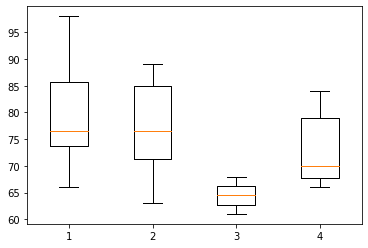

In [20]:
a = [66, 74, 82, 75, 73, 97, 78, 98]
b = [72, 89, 69, 74, 79, 88, 84, 63]
c = [61, 62, 63, 64, 65, 66, 67, 68]
d = [84, 82, 78, 71, 69, 68, 67, 66]

# 평균비교
print('a 평균 :', np.mean(a))
print('b 평균 :', np.mean(b))
print('c 평균 :', np.mean(c))
print('d 평균 :', np.mean(d))

# 그래프
plot_data = [a, b, c, d]
ax = plt.boxplot(plot_data)
plt.show()

In [22]:
#------------------------------------------------------------
result = stats.f_oneway(a,b,c,d)
print("f - 통계량 : %.3f, p_value:%.3f"%result)

f - 통계량 : 5.479, p_value:0.004


95% 신뢰수준하에 p_value가 유의수준(0.05)보다 작게 나와서

대립가설인 "4개의 교육훈련 기법간의 차이가 있다"가 통계적으로 유의미하다